In [1]:
from Utils import Preprocessing
from Models import ConvAutoencoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2023-09-29 21:22:42.837570: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-29 21:22:42.876055: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-29 21:22:42.876092: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-29 21:22:42.876127: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-29 21:22:42.883797: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-29 21:22:42.884572: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [3]:
def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(208, 176))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(208, 176))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [4]:
dict_train_count, dict_test_count, class_weights = Preprocessing.class_occurences()

In [5]:
X_train, y_train, labels_list_train, X_test, y_test, labels_list_test = Preprocessing.to_numpy_arrays(class_weights=class_weights)

In [6]:
X_train[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
y_train

array([[0.0203125 ],
       [0.0203125 ],
       [0.02901786],
       [0.07252441],
       [0.0203125 ],
       [0.0203125 ],
       [0.0203125 ],
       [0.0203125 ],
       [0.0203125 ],
       [0.02901786],
       [0.0203125 ],
       [0.02901786],
       [0.0203125 ],
       [0.0203125 ],
       [0.0203125 ],
       [0.0203125 ],
       [0.02901786],
       [0.07252441],
       [0.07252441],
       [0.07252441],
       [0.02901786],
       [0.0203125 ],
       [0.0203125 ],
       [0.0203125 ],
       [0.02901786],
       [0.02901786],
       [0.02901786],
       [0.07252441],
       [0.07252441],
       [0.0203125 ],
       [0.0203125 ],
       [0.07252441],
       [0.0203125 ],
       [0.0203125 ],
       [0.0203125 ],
       [1.        ],
       [0.02901786],
       [0.0203125 ],
       [0.0203125 ],
       [0.0203125 ],
       [0.07252441],
       [0.0203125 ],
       [0.0203125 ],
       [0.0203125 ],
       [0.0203125 ],
       [0.07252441],
       [0.02901786],
       [0.020

In [8]:
X_train.shape

(250, 208, 176)

In [9]:
validation_percentage = 0.25
X_val = X_train[int(1-validation_percentage * len(X_train)):]
X_train = X_train[:int(1-validation_percentage * len(X_train))]
y_val = y_train[int(1-validation_percentage * len(y_train)):]
y_train = y_train[:int(1-validation_percentage * len(y_train))]
labels_list_val = labels_list_train[int(1-validation_percentage * len(labels_list_train)):]
labels_list_train = labels_list_train[:int(1-validation_percentage * len(labels_list_train))]

In [10]:
img_height=208
img_width=176

In [11]:
#input = layers.Input(shape=(img_height, img_width, 1))
#
## Encoder
#conv_1 = layers.Conv2D(filters = 32, kernel_size=3, activation="relu", padding="same",input_shape=(img_height, img_width, 1))(input)
#poolin_1 = layers.MaxPooling2D((2, 2), padding="same")(conv_1)
#conv_2 = layers.Conv2D(filters = 32, kernel_size=3, activation="relu", padding="same")(poolin_1)
#latent_space = layers.MaxPooling2D((2, 2), padding="same")(conv_2)
#
#encoder_model = Model(inputs=[input], outputs=[latent_space])
## Decoder
#conv_T1 = layers.Conv2DTranspose(filters = 32, kernel_size=3, strides=2, activation="relu", padding="same")(latent_space)
#conv_T2 = layers.Conv2DTranspose(filters = 32, kernel_size=3, strides=2, activation="relu", padding="same")(conv_T1)
#output = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(conv_T2)
#
## Autoencoder
#ConvAutoencoder = Model(
#    inputs = [input],
#    outputs = [output]
#    )
#
#ConvAutoencoder.compile(
#    optimizer="adam",
#    loss="mse",
#    )

In [12]:
input = layers.Input(shape=(img_height, img_width, 1),name="input")
flatten = layers.Flatten()(input)
# Encoder
dense_1 = layers.Dense(300, activation="tanh")(flatten)
#dense_2 = layers.Dense(1200, activation="gelu")(dense_1)
latent_space = layers.Dense(150, activation="tanh")(dense_1)

encoder_model = Model(inputs=[input], outputs=[latent_space])
dense_class_regression_1 = layers.Dense(100, activation="tanh")(latent_space)
dense_class_regression_2 = layers.Dense(50, activation="tanh")(dense_class_regression_1)
output_class_regression = layers.Dense(1, activation="tanh", name="output_class_regression")(dense_class_regression_2)
# Decoder
dense_3 = layers.Dense(300, activation="tanh")(latent_space)
#dense_4 = layers.Dense(1500, activation="gelu")(dense_3)
dense_5 = layers.Dense(img_height * img_width, activation="tanh")(dense_3)
output = layers.Reshape((img_height, img_width, 1),name="output_autoencoder")(dense_5)

# Autoencoder
autoencoder = Model(
    inputs = [input],
    outputs = [output,output_class_regression]
    )

autoencoder.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=["mse","mse"],
    loss_weights=[0.25, 0.75],
    )

In [13]:
autoencoder.fit(
    x={"input": X_train},
    y={"output_autoencoder": X_train, "output_class_regression": y_train},
    epochs=20,
    batch_size=16,
    shuffle=True,
    verbose=1,
    validation_data=(X_val, {"output_autoencoder": X_val, "output_class_regression": y_val}),
)

Epoch 1/20
12/12 [==============================] - 6s 449ms/step - loss: 0.7987 - output_autoencoder_loss: 0.0784 - output_class_regression_loss: 1.0388
Epoch 2/20
12/12 [==============================] - 5s 454ms/step - loss: 0.3957 - output_autoencoder_loss: 0.0287 - output_class_regression_loss: 0.5180
Epoch 3/20
12/12 [==============================] - 5s 443ms/step - loss: 0.0336 - output_autoencoder_loss: 0.0218 - output_class_regression_loss: 0.0375
Epoch 4/20
12/12 [==============================] - 5s 443ms/step - loss: 0.0208 - output_autoencoder_loss: 0.0198 - output_class_regression_loss: 0.0211
Epoch 5/20
12/12 [==============================] - 5s 449ms/step - loss: 0.0164 - output_autoencoder_loss: 0.0194 - output_class_regression_loss: 0.0154
Epoch 6/20
12/12 [==============================] - 5s 450ms/step - loss: 0.0171 - output_autoencoder_loss: 0.0193 - output_class_regression_loss: 0.0164
Epoch 7/20
12/12 [==============================] - 5s 448ms/step - loss: 0.

In [14]:
predictions = autoencoder.predict(X_val)
#predictions

2/2 [==============================] - 0s 29ms/step


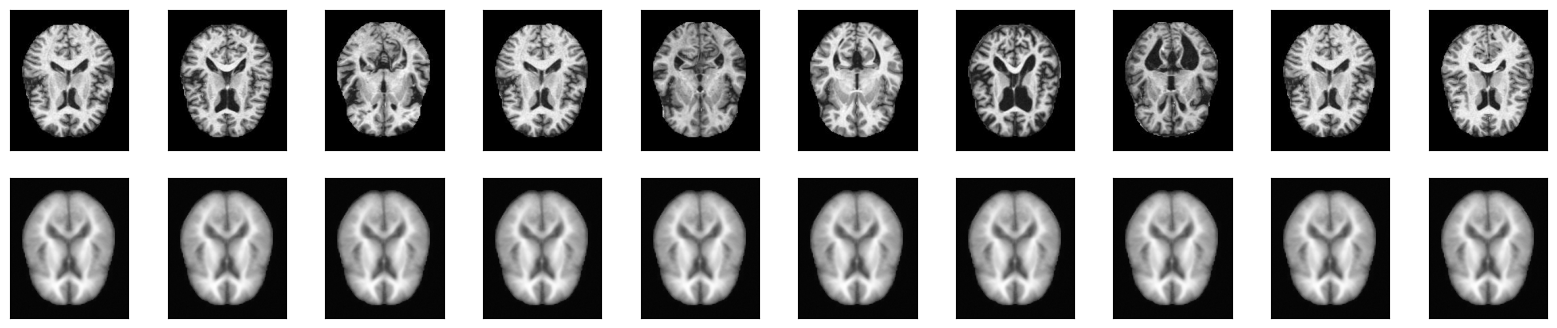

In [28]:
display(X_val, predictions[0])

In [ ]:
#autoencoder = ConvAutoencoder.buid_Model(img_height=208, img_width=176)